In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [2]:
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
llm=ChatGroq(model="llama-3.1-8b-instant")

In [3]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage,AIMessage,HumanMessage

In [4]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [9]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [10]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

In [11]:
graph=StateGraph(State)

In [12]:
graph.add_node("chatbot",chatbot)
graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)


In [14]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
build_graph=graph.compile(checkpointer=memory)

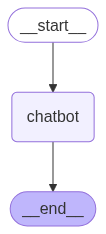

In [15]:
display(Image(build_graph.get_graph().draw_mermaid_png()))

In [17]:
config={"configurable":{"thread_id":"34"}}
build_graph.invoke({"messages":HumanMessage("hey Its Mallikarjun Sonna Agentic AI engineer")},config)

{'messages': [HumanMessage(content='hey Its Mallikarjun Sonna Agentic AI engineer', additional_kwargs={}, response_metadata={}, id='68bd1384-d863-4991-9408-893abc58be7f'),
  AIMessage(content='Nice to meet you, Mallikarjun Sonna. I see you\'re an AI engineer with the title "Agentic." That\'s an interesting term - I\'d love to learn more about your work and what you mean by "Agentic AI engineering." \n\nCould you tell me a bit about your background, what inspired you to work in AI, and what specific areas of AI you\'re interested in or specialize in?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 47, 'total_tokens': 133, 'completion_time': 0.217602319, 'prompt_time': 0.107456016, 'queue_time': 0.043233968, 'total_time': 0.325058335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d2b6c28-335b-429a-b837-3eab0da58d5e-0', usa

In [18]:
for chunk in build_graph.stream({"messages":"basically I love Tea"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hey Its Mallikarjun Sonna Agentic AI engineer', additional_kwargs={}, response_metadata={}, id='68bd1384-d863-4991-9408-893abc58be7f'), AIMessage(content='Nice to meet you, Mallikarjun Sonna. I see you\'re an AI engineer with the title "Agentic." That\'s an interesting term - I\'d love to learn more about your work and what you mean by "Agentic AI engineering." \n\nCould you tell me a bit about your background, what inspired you to work in AI, and what specific areas of AI you\'re interested in or specialize in?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 47, 'total_tokens': 133, 'completion_time': 0.217602319, 'prompt_time': 0.107456016, 'queue_time': 0.043233968, 'total_time': 0.325058335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d2b6c28-335b-429a-b837-3eab0da58d5e-0', usage

In [19]:
for chunk in build_graph.stream({"messages":"I love sports as well "},config=config,stream_mode="updates"):
    print(chunk)

{'chatbot': {'messages': [AIMessage(content="Sports is a great interest to have. It's a fantastic way to stay active, watch thrilling competitions, and be part of a community that shares your passion.\n\nWhat type of sports do you enjoy watching or playing? Are you more into team sports like cricket, football, or basketball, or do you prefer individual sports like tennis or swimming? \n\nIn India, cricket is a huge sport, and many people grow up watching the Indian Premier League (IPL) or international cricket matches. Are you a cricket fan, or do you have a different favorite sport?\n\n(By the way, I'm curious - how do you balance your love for tea and sports? Do you enjoy tea during matches or while watching sports on TV?)", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 262, 'total_tokens': 407, 'completion_time': 0.242252596, 'prompt_time': 0.0298023, 'queue_time': 0.045351634, 'total_time': 0.272054896}, 'model_name': 'llama-3.1

In [24]:
config={"configurable":{"thread_id":"36"}}

async for event in build_graph.astream_events({"messages":HumanMessage(content="hello")},config=config,version="v1"):
    print(event)

{'event': 'on_chain_start', 'run_id': '41b9639c-5cf0-418c-bafd-452878a7f3f3', 'name': 'LangGraph', 'tags': [], 'metadata': {'thread_id': '36'}, 'data': {'input': {'messages': HumanMessage(content='hello', additional_kwargs={}, response_metadata={})}}, 'parent_ids': []}
{'event': 'on_chain_start', 'name': 'chatbot', 'run_id': '11236c7e-fe97-4a61-9a19-ce98bea84583', 'tags': ['graph:step:1'], 'metadata': {'thread_id': '36', 'langgraph_step': 1, 'langgraph_node': 'chatbot', 'langgraph_triggers': ('branch:to:chatbot',), 'langgraph_path': ('__pregel_pull', 'chatbot'), 'langgraph_checkpoint_ns': 'chatbot:f401b9e1-d591-42d7-1bd7-f42d01feb1b4'}, 'data': {'input': {'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='a456e1c8-a14d-4fb3-81fc-0ced8d5cc829')]}}, 'parent_ids': []}
{'event': 'on_chat_model_start', 'name': 'ChatGroq', 'run_id': '4222a426-14e2-4432-b03e-8aa3a754ad4e', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '36', 'langgraph_step': 1, 'lan